In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,Embedding,GlobalMaxPooling1D

## Data

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-04-21 19:35:24--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  2.05MB/s    in 0.2s    

2020-04-21 19:35:24 (2.05 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.columns = ['label','data']

In [9]:
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df['b_labels'] = df['label'].map({'ham':0,'spam':1})
Y = df['b_labels'].values

In [13]:
df.head()

,label,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Text Tokenization

In [0]:
df_train,df_test,Y_train,Y_test = train_test_split(df['data'],Y,test_size=0.33)

In [0]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequence_train = tokenizer.texts_to_sequences(df_train)
sequence_test = tokenizer.texts_to_sequences(df_test)

In [19]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(f'Number of unique tokens: {V}')

Number of unique tokens: 7145


In [21]:
data_train = pad_sequences(sequence_train) # Creating NxT matrix
print(f'Shape of the data train: {data_train.shape}')

Shape of the data train: (3733, 189)


In [23]:
T = data_train.shape[1]
data_test = pad_sequences(sequence_test,maxlen=T) # Creating NxT matrix
print(f'Shape of the data test: {data_test.shape}')

Shape of the data test: (1839, 189)


## Model

In [0]:
 D = 20 

 i = Input(shape=(T,))
 x = Embedding(V+1,D)(i)
 x = Conv1D(32,3,activation='relu')(x)
 x = MaxPooling1D(3)(x)
 x = Conv1D(64,3,activation='relu')(x)
 x = MaxPooling1D(3)(x)
 x = Conv1D(128,3,activation='relu')(x)
 x = GlobalMaxPooling1D()(x)
 x = Dense(1,activation='sigmoid')(x)

 model = Model(i,x)

 model.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [28]:
model.fit(data_train,Y_train,
          epochs=5,
          validation_data=(data_test,Y_test))

Epoch 1/5
117/117 [==============================] - 3s 22ms/step - loss: 0.3847 - accuracy: 0.8661 - val_loss: 0.2771 - val_accuracy: 0.8657
Epoch 2/5
117/117 [==============================] - 2s 20ms/step - loss: 0.1453 - accuracy: 0.9392 - val_loss: 0.1010 - val_accuracy: 0.9603
Epoch 3/5
117/117 [==============================] - 2s 20ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.1119 - val_accuracy: 0.9782
Epoch 4/5
117/117 [==============================] - 2s 20ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0753 - val_accuracy: 0.9837
Epoch 5/5
117/117 [==============================] - 2s 20ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0806 - val_accuracy: 0.9853


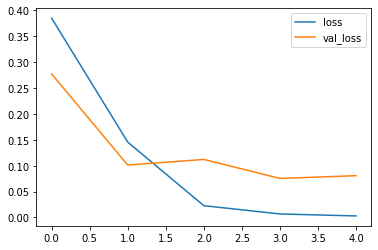

In [29]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

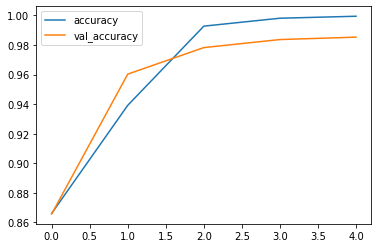

In [30]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()